# **Assignment 2**

This assignment focuses on Airbnbs in Berlin, Germany. The goal is to help a company operating small and mid-size apartments hosting 2-6 guests. The company is set to price their new apartments not on the market. This assignment will build a prediction model for prices, and discuss the modeling decisions and compare the results to those of the case study. 

Task
• You may use other variables we used in class.

• You may do different feature engineering depending on the selected environment.

• You may make other sample design decisions!

• In each case, document your steps!

• Have at least 3 different models and compare performance

• Argue for your choice of models
- One model must be theoretically profound linear regression via OLS.
- One model must be Random Forest or any boosting algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys
import ast
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [176]:
# DATA IMPORT - FROM GITHUB
data = pd.read_csv('https://github.com/Iandrewburg/Assignment_1/raw/main/Assignment_2/berlin_airbnb.csv')

In [177]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176.0,https://www.airbnb.com/rooms/3176,2.023090e+13,16/09/2023,city scrape,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.62,First name and Last name: Nicolas Krotz <br/> ...,f,1,1,0,0,0.85
1,9991.0,https://www.airbnb.com/rooms/9991,2.023090e+13,16/09/2023,city scrape,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,...,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.08
2,14325.0,https://www.airbnb.com/rooms/14325,2.023090e+13,16/09/2023,city scrape,Rental unit in Berlin · ★4.67 · Studio · 1 bed...,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,...,4.84,4.58,4.42,NaN,f,4,4,0,0,0.16
3,16644.0,https://www.airbnb.com/rooms/16644,2.023090e+13,16/09/2023,city scrape,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,Light and sunny 2-Room-turn of the century-fla...,Our Part of Kreuzberg is just the best. Good v...,https://a0.muscache.com/pictures/73759174/e2ef...,64696,...,4.86,4.67,4.71,NaN,f,2,2,0,0,0.30
4,17904.0,https://www.airbnb.com/rooms/17904,2.023090e+13,16/09/2023,city scrape,Rental unit in Berlin · ★4.77 · Studio · 1 bed...,"- apt is available starting April 1, 2023<br /...",NaN,https://a0.muscache.com/pictures/d9a6f8be-54b9...,68997,...,4.92,4.87,4.65,NaN,f,1,1,0,0,1.81


In [178]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13134 entries, 0 to 13133
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13134 non-null  float64
 1   listing_url                                   13134 non-null  object 
 2   scrape_id                                     13134 non-null  float64
 3   last_scraped                                  13134 non-null  object 
 4   source                                        13134 non-null  object 
 5   name                                          13134 non-null  object 
 6   description                                   12997 non-null  object 
 7   neighborhood_overview                         6771 non-null   object 
 8   picture_url                                   13134 non-null  object 
 9   host_id                                       13134 non-null 

In [180]:
data.room_type.value_counts()

room_type
Entire home/apt    8431
Private room       4309
Shared room         262
Hotel room          132
Name: count, dtype: int64

In [181]:
data.property_type.value_counts()

property_type
Entire rental unit             6545
Private room in rental unit    3261
Entire condo                    756
Entire serviced apartment       407
Room in hotel                   297
                               ... 
Shared room in condo              1
Private room in boat              1
Treehouse                         1
Island                            1
Dome                              1
Name: count, Length: 67, dtype: int64

In [182]:
data.amenities

0        ["Kitchen", "Crib", "Essentials", "Patio or ba...
1        ["Refrigerator", "TV with standard cable", "Ba...
2        ["Wifi", "TV", "Refrigerator", "Heating", "Cof...
3        ["Kitchen", "Essentials", "Wifi", "TV", "High ...
4        ["Long term stays allowed", "Kitchen", "Essent...
                               ...                        
13129    ["Wifi", "TV", "Smoke alarm", "Washer", "Kitch...
13130    ["Wifi", "TV", "Dedicated workspace", "Smoke a...
13131    ["Wifi", "TV", "Smoke alarm", "Washer", "Kitch...
13132    ["Fire extinguisher", "Wifi", "TV", "Paid park...
13133    ["Long term stays allowed", "Room-darkening sh...
Name: amenities, Length: 13134, dtype: object

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13134 entries, 0 to 13133
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13134 non-null  float64
 1   listing_url                                   13134 non-null  object 
 2   scrape_id                                     13134 non-null  float64
 3   last_scraped                                  13134 non-null  object 
 4   source                                        13134 non-null  object 
 5   name                                          13134 non-null  object 
 6   description                                   12997 non-null  object 
 7   neighborhood_overview                         6771 non-null   object 
 8   picture_url                                   13134 non-null  object 
 9   host_id                                       13134 non-null 

In [184]:
def airbnb_cleaner(data): 
    
    # Convert the string representations of lists into actual lists
    data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x))

    # Flatten the list to count each amenity's occurrence
    all_amenities = [amenity for sublist in data['amenities'] for amenity in sublist]

    # Find the top 15 most frequent amenities
    amenities_series = pd.Series(all_amenities)
    top_15_amenities = amenities_series.value_counts().head(15).index.tolist()

    # Create binary variables for these top 15 amenities
    for amenity in top_15_amenities:
        # Correctly format column names by replacing spaces with underscores
        # Ensure any potential quotes are handled correctly
        column_name = "amenities_" + amenity.replace(' ', '_').replace('"', '')
        data[column_name] = data['amenities'].apply(lambda x: 1 if amenity in x else 0)
    
    # Filter the data
    data = data[(data.accommodates >= 2) & (data.accommodates <= 6)]
    
    # Define the top amenities columns to keep
    top_amenities_columns = [
        'amenities_Kitchen', 'amenities_Wifi', 'amenities_Essentials', 'amenities_Hair_dryer', 'amenities_Heating',
        'amenities_Hangers', 'amenities_Smoke_alarm', 'amenities_Hot_water', 'amenities_Dishes_and_silverware',
        'amenities_Washer', 'amenities_Iron', 'amenities_Refrigerator', 'amenities_Cooking_basics',
        'amenities_Bed_linens', 'amenities_Shampoo'
    ]
    
    # columns to keep
    columns = list(set([
        'accommodates', 'beds', 'review_scores_rating', 'host_is_superhost',
        'latitude', 'longitude', 'host_since', 'number_of_reviews',
        'availability_365', 'minimum_nights', 'maximum_nights', 'property_type',
        'room_type', 'beds', 'price'
    ] + top_amenities_columns))
    
    # Ensure the 'amenities' column is dropped
    columns = [col for col in columns if col != 'amenities'] 

    # Creating a new DataFrame with only the selected columns
    data = data[columns]
    
    # Proceed with cleaning as before
    data = data[data['price'] != 0]
    data = data.dropna(subset=['price'])
    data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float).astype(int)
    
    property_type_value_counts = data['property_type'].value_counts()
    to_remove = property_type_value_counts[property_type_value_counts < 100].index
    data = data[~data['property_type'].isin(to_remove)]

    property_dummies = pd.get_dummies(data['property_type'], prefix='d_type')
    data = pd.concat([data, property_dummies], axis=1)

    room_dummies = pd.get_dummies(data['room_type'], prefix='d_room')
    data = pd.concat([data, room_dummies], axis=1)

    data.rename(columns=lambda x: x.replace(" ", "_").lower(), inplace=True)
    
    data = data.rename(columns={
        'review_scores_rating': 'n_review_scores_rating',
        'host_since': 'date_host_start',
        'minimum_nights': 'n_minimum_nights',
        'accommodates': 'n_accommodates',
        'beds': 'n_beds',
        'availability_365': 'n_availability_365',
        'number_of_reviews': 'n_number_of_reviews',
        'maximum_nights': 'n_maximum_nights',
        'room_type': 'f_room_type',
        'property_type': 'f_property_type',
        'd_room_entire_home/apt': 'd_room_entire_apt'
    })

    data['date_host_start'] = pd.to_datetime(data['date_host_start'])
    data['n_beds'] = data['n_beds'].fillna(0).astype(int)
    data['host_is_superhost'] = data['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
    data['n_review_scores_rating'] = data['n_review_scores_rating'].fillna(0)
    d_columns = data.columns[data.columns.str.startswith('d_')]
    data[d_columns] = data[d_columns].astype(int)
    
    
    # resort the data by alphabetical order
    data = data.reindex(sorted(data.columns), axis=1)
    
    return data

# Assume 'data' is your DataFrame loaded earlier
data = airbnb_cleaner(data)


In [185]:
data.dtypes

amenities_bed_linens                           int64
amenities_cooking_basics                       int64
amenities_dishes_and_silverware                int64
amenities_essentials                           int64
amenities_hair_dryer                           int64
amenities_hangers                              int64
amenities_heating                              int64
amenities_hot_water                            int64
amenities_iron                                 int64
amenities_kitchen                              int64
amenities_refrigerator                         int64
amenities_shampoo                              int64
amenities_smoke_alarm                          int64
amenities_washer                               int64
amenities_wifi                                 int64
d_room_entire_apt                              int32
d_room_hotel_room                              int32
d_room_private_room                            int32
d_type_entire_condo                           

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10331 entries, 0 to 13133
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   amenities_bed_linens                10331 non-null  int64         
 1   amenities_cooking_basics            10331 non-null  int64         
 2   amenities_dishes_and_silverware     10331 non-null  int64         
 3   amenities_essentials                10331 non-null  int64         
 4   amenities_hair_dryer                10331 non-null  int64         
 5   amenities_hangers                   10331 non-null  int64         
 6   amenities_heating                   10331 non-null  int64         
 7   amenities_hot_water                 10331 non-null  int64         
 8   amenities_iron                      10331 non-null  int64         
 9   amenities_kitchen                   10331 non-null  int64         
 10  amenities_refrigerator     

In [187]:
data.isna().sum().sum()

6

In [188]:
data.shape

(10331, 41)

In [189]:
data.columns

Index(['amenities_bed_linens', 'amenities_cooking_basics',
       'amenities_dishes_and_silverware', 'amenities_essentials',
       'amenities_hair_dryer', 'amenities_hangers', 'amenities_heating',
       'amenities_hot_water', 'amenities_iron', 'amenities_kitchen',
       'amenities_refrigerator', 'amenities_shampoo', 'amenities_smoke_alarm',
       'amenities_washer', 'amenities_wifi', 'd_room_entire_apt',
       'd_room_hotel_room', 'd_room_private_room', 'd_type_entire_condo',
       'd_type_entire_home', 'd_type_entire_loft', 'd_type_entire_rental_unit',
       'd_type_entire_serviced_apartment', 'd_type_private_room_in_condo',
       'd_type_private_room_in_home', 'd_type_private_room_in_rental_unit',
       'd_type_room_in_hotel', 'date_host_start', 'f_property_type',
       'f_room_type', 'host_is_superhost', 'latitude', 'longitude',
       'n_accommodates', 'n_availability_365', 'n_beds', 'n_maximum_nights',
       'n_minimum_nights', 'n_number_of_reviews', 'n_review_scores_ra

### EDA

In [190]:
# copy a variable - purpose later, see at variable importance
data['n_accommodates_copy'] = data['n_accommodates']

***numerical variables***

In [191]:
# too long to display and read
data.describe().T

,count,mean,min,25%,50%,75%,max,std
amenities_bed_linens,10331.0,0.542445,0.0,0.0,1.0,1.0,1.0,0.498219
amenities_cooking_basics,10331.0,0.589391,0.0,0.0,1.0,1.0,1.0,0.491968
amenities_dishes_and_silverware,10331.0,0.625593,0.0,0.0,1.0,1.0,1.0,0.483993
amenities_essentials,10331.0,0.862356,0.0,1.0,1.0,1.0,1.0,0.344543
amenities_hair_dryer,10331.0,0.7432,0.0,0.0,1.0,1.0,1.0,0.436889
amenities_hangers,10331.0,0.689091,0.0,0.0,1.0,1.0,1.0,0.462888
amenities_heating,10331.0,0.714548,0.0,0.0,1.0,1.0,1.0,0.451651
amenities_hot_water,10331.0,0.663537,0.0,0.0,1.0,1.0,1.0,0.472522
amenities_iron,10331.0,0.593941,0.0,0.0,1.0,1.0,1.0,0.49112
amenities_kitchen,10331.0,0.936502,0.0,1.0,1.0,1.0,1.0,0.243869


***categorical variables***

In [192]:
data.f_room_type.value_counts()

f_room_type
Entire home/apt    7460
Private room       2825
Hotel room           46
Name: count, dtype: int64

In [193]:
data.f_property_type.value_counts()

f_property_type
Entire rental unit             6035
Private room in rental unit    2313
Entire condo                    707
Entire serviced apartment       360
Room in hotel                   253
Entire loft                     242
Private room in condo           181
Private room in home            124
Entire home                     116
Name: count, dtype: int64

***split train and test***
- train is where we do it all, incl CV

- first pick a smaller than usual training set so that models run faster and check if works
- if works, start anew without these two lines

In [194]:
data_train, data_holdout = train_test_split( data, train_size=0.7, random_state=42)

In [195]:
data_train.shape, data_holdout.shape

((7231, 42), (3100, 42))

In [255]:
basic_vars = [
    "n_accommodates",
    "n_beds",
    "f_property_type",
    "f_room_type",
    "host_is_superhost",
    "n_availability_365",
    "n_maximum_nights",
    "n_minimum_nights",
]

reviews = [
    "n_number_of_reviews",
    "n_review_scores_rating",
]

amenities = [col for col in data.columns if col.startswith("amenities_")]

room_booking_types = [col for col in data.columns if col.startswith("d_")]

X1 = [
    "f_property_type:n_accommodates",
    "f_room_type:n_accommodates",
]


X2 = [
    "price:host_is_superhost",
    "n_accommodates:price",
    "n_beds:price",
]


X3 = [
    # Interactions involving property types, room types, and number of accommodates
    "f_property_type:n_accommodates:f_room_type",
    "f_property_type:n_review_scores_rating",
    "f_room_type:n_review_scores_rating",
    
    # Interactions with amenities
    "amenities_wifi:n_accommodates",
    "amenities_kitchen:n_accommodates",
    
    # Host characteristics and listing features
    "host_is_superhost:n_review_scores_rating",
    "host_is_superhost:price",
    
    # Incorporating time aspects (if date_host_start represents how long the host has been active, we can use it as a proxy for experience)
    "date_host_start:n_review_scores_rating",
    "date_host_start:price",
    
    # More detailed interactions with amenities
    "amenities_essentials:amenities_hair_dryer:n_accommodates",
    "amenities_essentials:amenities_hair_dryer:price",
    
    # Cross-amenity interactions
    "amenities_kitchen:amenities_washer:n_accommodates",
    "amenities_wifi:amenities_kitchen:n_review_scores_rating",
]

predictors_1 = basic_vars
predictors_2 = basic_vars + reviews + amenities + room_booking_types
predictors_E = basic_vars + reviews + amenities + room_booking_types + X1 + X2 + X3


### Random Forest

In [256]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data_train)

In [257]:
type(X)

patsy.design_info.DesignMatrix

In [258]:
X

DesignMatrix with shape (7231, 46)
  Columns:
    ['Intercept',
     'f_property_type[T.Entire home]',
     'f_property_type[T.Entire loft]',
     'f_property_type[T.Entire rental unit]',
     'f_property_type[T.Entire serviced apartment]',
     'f_property_type[T.Private room in condo]',
     'f_property_type[T.Private room in home]',
     'f_property_type[T.Private room in rental unit]',
     'f_property_type[T.Room in hotel]',
     'f_room_type[T.Hotel room]',
     'f_room_type[T.Private room]',
     'n_accommodates',
     'n_beds',
     'host_is_superhost',
     'n_availability_365',
     'n_maximum_nights',
     'n_minimum_nights',
     'n_number_of_reviews',
     'n_review_scores_rating',
     'amenities_bed_linens',
     'amenities_cooking_basics',
     'amenities_dishes_and_silverware',
     'amenities_essentials',
     'amenities_hair_dryer',
     'amenities_hangers',
     'amenities_heating',
     'amenities_hot_water',
     'amenities_iron',
     'amenities_kitchen',
     'a

In [259]:
X.design_info.column_names

['Intercept',
 'f_property_type[T.Entire home]',
 'f_property_type[T.Entire loft]',
 'f_property_type[T.Entire rental unit]',
 'f_property_type[T.Entire serviced apartment]',
 'f_property_type[T.Private room in condo]',
 'f_property_type[T.Private room in home]',
 'f_property_type[T.Private room in rental unit]',
 'f_property_type[T.Room in hotel]',
 'f_room_type[T.Hotel room]',
 'f_room_type[T.Private room]',
 'n_accommodates',
 'n_beds',
 'host_is_superhost',
 'n_availability_365',
 'n_maximum_nights',
 'n_minimum_nights',
 'n_number_of_reviews',
 'n_review_scores_rating',
 'amenities_bed_linens',
 'amenities_cooking_basics',
 'amenities_dishes_and_silverware',
 'amenities_essentials',
 'amenities_hair_dryer',
 'amenities_hangers',
 'amenities_heating',
 'amenities_hot_water',
 'amenities_iron',
 'amenities_kitchen',
 'amenities_refrigerator',
 'amenities_shampoo',
 'amenities_smoke_alarm',
 'amenities_washer',
 'amenities_wifi',
 'd_room_entire_apt',
 'd_room_hotel_room',
 'd_room_p

In [260]:
np.asarray(X)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [261]:
import math

In [262]:
print('The theoretical recommended number of variables: {:.2f}.'.format(math.sqrt(len(X.design_info.column_names))))

The theoretical recommended number of variables: 6.78.


In [263]:
X.shape

(7231, 46)

In [264]:
type(y)

patsy.design_info.DesignMatrix

In [265]:
# a two-dimensional object
y.shape

(7231, 1)

In [266]:
# using ravel() we flatten it to a one-dimensional data object. 
y.ravel().shape

(7231,)

In [267]:
rfr = RandomForestRegressor(random_state = 20240211)

In [268]:
tune_grid = {"max_features": [6, 8, 10, 12], "min_samples_leaf": [5, 10, 15]}

In [269]:
rf_random = GridSearchCV(
    rfr,
    tune_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
)

In [270]:
%%time
rf_model = rf_random.fit(X, y.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_features=6, min_samples_leaf=5;, score=-99.024 total time=   0.8s
[CV 2/5] END max_features=6, min_samples_leaf=5;, score=-602.054 total time=   0.8s
[CV 3/5] END max_features=6, min_samples_leaf=5;, score=-107.647 total time=   0.8s
[CV 4/5] END max_features=6, min_samples_leaf=5;, score=-686.348 total time=   0.7s
[CV 5/5] END max_features=6, min_samples_leaf=5;, score=-64.438 total time=   0.8s
[CV 1/5] END max_features=6, min_samples_leaf=10;, score=-81.762 total time=   0.7s
[CV 2/5] END max_features=6, min_samples_leaf=10;, score=-632.616 total time=   0.6s
[CV 3/5] END max_features=6, min_samples_leaf=10;, score=-88.085 total time=   0.7s
[CV 4/5] END max_features=6, min_samples_leaf=10;, score=-696.215 total time=   0.6s
[CV 5/5] END max_features=6, min_samples_leaf=10;, score=-65.225 total time=   0.6s
[CV 1/5] END max_features=6, min_samples_leaf=15;, score=-75.624 total time=   0.6s
[CV 2/5] END ma

In [271]:
rf_model.cv_results_

{'mean_fit_time': array([0.83768282, 0.70213561, 0.59320312, 0.95177002, 0.79392385,
        0.71650362, 1.11914959, 0.91330633, 0.8610146 , 1.30007019,
        1.08194737, 0.97066898]),
 'std_fit_time': array([0.03717141, 0.03483673, 0.03442005, 0.02040954, 0.02661497,
        0.02458997, 0.02699757, 0.02933208, 0.03258736, 0.05604424,
        0.02943708, 0.03049621]),
 'mean_score_time': array([0.03609877, 0.03311629, 0.0299222 , 0.03540883, 0.03354645,
        0.03137646, 0.03799024, 0.03372288, 0.03111305, 0.03972483,
        0.03399425, 0.0323494 ]),
 'std_score_time': array([0.00170054, 0.00204704, 0.0012055 , 0.00105219, 0.00159247,
        0.0017352 , 0.00183076, 0.00154365, 0.00144011, 0.00165854,
        0.000963  , 0.00295922]),
 'param_max_features': masked_array(data=[6, 6, 6, 8, 8, 8, 10, 10, 10, 12, 12, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dty

In [272]:
df_rf_model_cv_results = pd.DataFrame(rf_model.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'mean_test_score']]

In [273]:
df_rf_model_cv_results.columns = ['max features', 'min node size', 'RMSE']

In [274]:
df_rf_model_cv_results

,max features,min node size,RMSE
0,6,5,-311.902235
1,6,10,-312.780588
2,6,15,-314.542835
3,8,5,-314.733398
4,8,10,-313.546333
5,8,15,-314.979453
6,10,5,-313.583365
7,10,10,-314.281562
8,10,15,-314.693904
9,12,5,-321.509076


In [275]:
df_rf_model_cv_results.pivot(
    index = 'max features', 
    columns = 'min node size', 
    values = 'RMSE').round(2)*-1

min node size,5,10,15
max features,,,
6,311.90,312.78,314.54
8,314.73,313.55,314.98
10,313.58,314.28,314.69
12,321.51,313.99,316.72


In [276]:
rf_model.best_score_

-311.9022354474775

In [277]:
rf_model.best_params_

{'max_features': 6, 'min_samples_leaf': 5}

In [278]:
rf_model.best_estimator_

RandomForestRegressor(max_features=6, min_samples_leaf=5, random_state=20240211)

### Diagnostics

feature importances

**individual**

In [279]:
rf_model.best_estimator_.feature_importances_

array([0.00000000e+00, 1.18750944e-04, 1.47614273e-03, 1.57246521e-02,
       9.95125897e-03, 5.26343445e-04, 2.04278285e-04, 1.01237046e-02,
       4.76715528e-02, 9.03909450e-04, 1.94667724e-02, 5.30460377e-02,
       4.97181710e-02, 2.99653737e-03, 1.80697284e-01, 6.08844348e-02,
       1.00702835e-01, 3.85124755e-02, 3.58937944e-02, 3.05771135e-02,
       3.88500371e-03, 5.69850796e-03, 2.32209880e-03, 3.03399123e-03,
       7.77053822e-03, 8.50452345e-03, 2.30445276e-02, 4.04789406e-02,
       3.03218341e-02, 5.97728024e-02, 1.37280796e-02, 1.03303476e-02,
       2.55021719e-02, 1.21354885e-03, 1.44270945e-02, 1.75040268e-03,
       1.02338152e-02, 7.99408044e-04, 2.46741893e-04, 1.13931630e-03,
       9.56601260e-03, 1.23161852e-02, 2.02133978e-04, 4.12065844e-04,
       1.59228197e-02, 3.81810390e-02])

In [280]:
pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)

,0
Intercept,0.000000
f_property_type[T.Entire home],0.000119
f_property_type[T.Entire loft],0.001476
f_property_type[T.Entire rental unit],0.015725
f_property_type[T.Entire serviced apartment],0.009951
f_property_type[T.Private room in condo],0.000526
f_property_type[T.Private room in home],0.000204
f_property_type[T.Private room in rental unit],0.010124
f_property_type[T.Room in hotel],0.047672
f_room_type[T.Hotel room],0.000904


In [281]:
df_var_imp = pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)\
    .reset_index()\
    .rename({"index": "variable", 0: "imp"}, axis=1)\
    .sort_values(by=["imp"], ascending=False)\
    .reset_index(drop = True)

df_var_imp['cumulative_imp'] = df_var_imp['imp'].cumsum()

In [282]:
df_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,n_availability_365,18.1%,18.1%
1,n_minimum_nights,10.1%,28.1%
2,n_maximum_nights,6.1%,34.2%
3,amenities_refrigerator,6.0%,40.2%
4,n_accommodates,5.3%,45.5%
5,n_beds,5.0%,50.5%
6,f_property_type[T.Room in hotel],4.8%,55.2%
7,amenities_iron,4.0%,59.3%
8,n_number_of_reviews,3.9%,63.1%
9,d_type_room_in_hotel,3.8%,67.0%


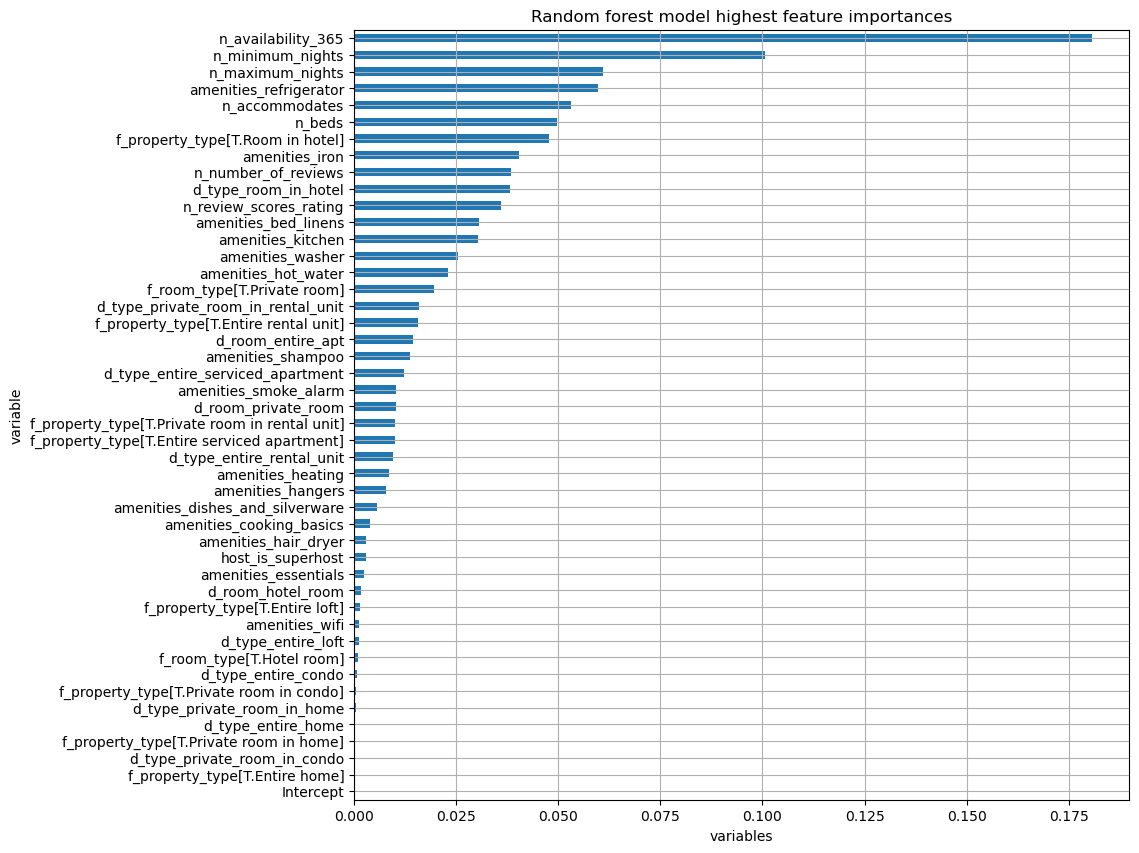

In [283]:
df_var_imp\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,10), grid = True, 
          title = 'Random forest model highest feature importances', 
          xlabel = 'variables', legend = False
         );

In [284]:
# we only care for variables with an importance of more than 1 pct
cutoff = 0.01

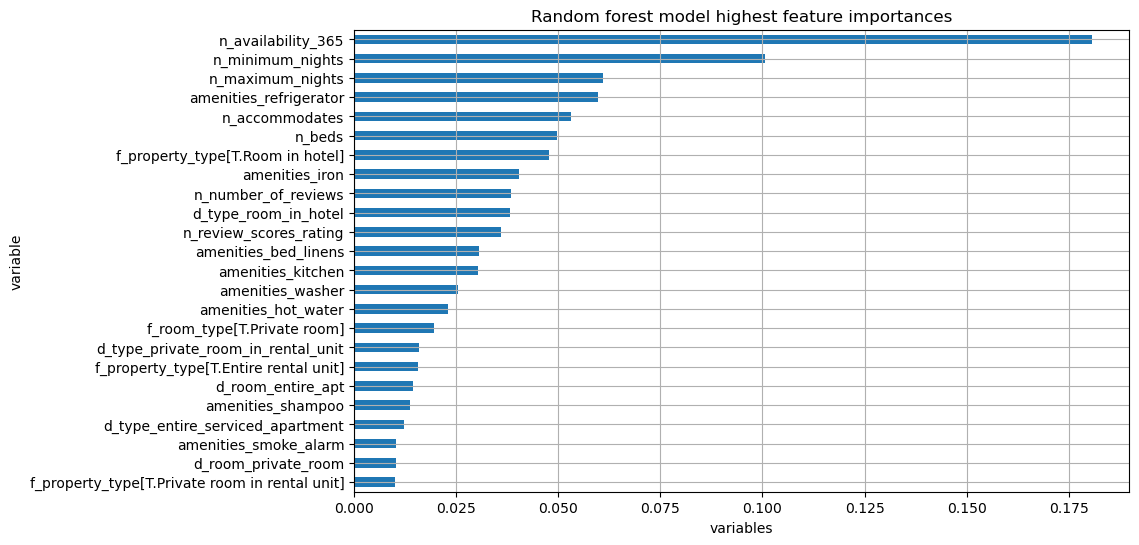

In [285]:
df_var_imp[df_var_imp.imp > cutoff]\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,6), grid = True, 
          title = 'Random forest model highest feature importances', 
          xlabel = 'variables', legend = False
         );

***grouped variable importance - keep binaries created off factors together***

For this, you need to create an `sklearn` Pipeline inclduing `OneHotEncoding` (before, encoding was done by patsy's `dmatrices`). This way permutation_importance can calculate factor variables' importance 

In [286]:
categorical_columns = [col for col in predictors_2 if col.startswith("f_")]
numerical_columns = [col for col in predictors_2 if col not in categorical_columns]

In [287]:
categorical_encoder = OneHotEncoder(handle_unknown="ignore")

preprocessing = ColumnTransformer([
    ("cat", categorical_encoder, categorical_columns),
    ("num", "passthrough", numerical_columns)])

rf_pipeline = Pipeline(
    [("preprocess", preprocessing), 
     ("regressor", rf_model.best_estimator_)] # put best model to pipeline
)

In [288]:
%%time
rf_pipeline.fit(data_train[predictors_2],data_train.price)

CPU times: total: 172 ms
Wall time: 918 ms


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['f_property_type',
                                                   'f_room_type']),
                                                 ('num', 'passthrough',
                                                  ['n_accommodates', 'n_beds',
                                                   'host_is_superhost',
                                                   'n_availability_365',
                                                   'n_maximum_nights',
                                                   'n_minimum_nights',
                                                   'n_number_of_reviews',
                                                   'n_review_scores_rating',
                                                   'amenities_bed_linens',
                                                   'amenities...
                                                   'amenities_refrigerator',
                                                   'amenities_shampoo',
                                                   'amenities_smoke_alarm',
                                                   'amenities_washer',
                                                   'amenities_wifi',
                                                   'd_room_entire_apt',
                                                   'd_room_hotel_room',
                                                   'd_room_private_room',
                                                   'd_type_entire_condo',
                                                   'd_type_entire_home',
                                                   'd_type_entire_loft',
                                                   'd_type_entire_rental_unit', ...])])),
                ('regressor',
                 RandomForestRegressor(max_features=6, min_samples_leaf=5,
                                       random_state=20240211))])

In [289]:
%%time
result = permutation_importance(
    rf_pipeline,
    data_holdout[predictors_2],
    data_holdout.price,
    n_repeats=10,
    random_state=45,
)

CPU times: total: 5.31 s
Wall time: 25.5 s


In [290]:
result

{'importances_mean': array([ 8.04389717e-02, -8.59610513e-03, -5.73358192e-02, -9.99376899e-03,
         3.27862905e-03,  2.87564934e-02, -1.24928821e-02,  1.24606860e-01,
         1.02100684e-03,  8.27122049e-03,  1.67928624e-02,  3.42660928e-03,
        -4.74938696e-03, -6.22987477e-05, -6.50940329e-04, -5.86407249e-03,
        -1.21464239e-03, -2.78246146e-02, -4.43856991e-03, -7.72261575e-02,
         1.30821007e-01, -1.52427171e-02, -8.41789412e-03, -1.12450167e-02,
         3.52601011e-04, -6.98848091e-03, -6.65280656e-05, -1.07436029e-02,
         3.95072289e-04, -7.01140365e-05, -1.95867765e-05, -3.27032804e-03,
         5.60812430e-03, -4.62650794e-05,  2.88533772e-04, -7.51232291e-03,
        -8.71966873e-02]),
 'importances_std': array([1.55184419e-02, 2.38027273e-02, 1.31227934e-02, 1.36821021e-02,
        8.41913723e-04, 8.18854649e-02, 1.53779479e-02, 4.66869899e-02,
        1.46985479e-02, 1.05214095e-02, 1.12372747e-02, 1.97096860e-03,
        2.44303190e-03, 4.67731833

In [291]:
pd.DataFrame(
        result.importances_mean,
        data_train[predictors_2].columns)

,0
n_accommodates,0.080439
n_beds,-0.008596
f_property_type,-0.057336
f_room_type,-0.009994
host_is_superhost,0.003279
n_availability_365,0.028756
n_maximum_nights,-0.012493
n_minimum_nights,0.124607
n_number_of_reviews,0.001021
n_review_scores_rating,0.008271


In [292]:
grouped = [
    "n_accommodates",
    "n_beds",
    "f_property_type",
    "f_room_type",
    "host_is_superhost",
    "n_availability_365",
    "n_maximum_nights",
    "n_minimum_nights",
]

In [293]:
df_grouped_var_imp = pd.DataFrame(
        result.importances_mean,
        data_train[predictors_2].columns)\
    .loc[grouped]\
    .sort_values(by = 0, ascending = False)\
    .reset_index()\
    .rename({'index': 'variable', 0: 'imp'}, axis = 1)
df_grouped_var_imp['cumulative_imp'] = df_grouped_var_imp.imp.cumsum()

In [294]:
df_grouped_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,n_minimum_nights,12.5%,12.5%
1,n_accommodates,8.0%,20.5%
2,n_availability_365,2.9%,23.4%
3,host_is_superhost,0.3%,23.7%
4,n_beds,-0.9%,22.8%
5,f_room_type,-1.0%,21.8%
6,n_maximum_nights,-1.2%,20.6%
7,f_property_type,-5.7%,14.9%


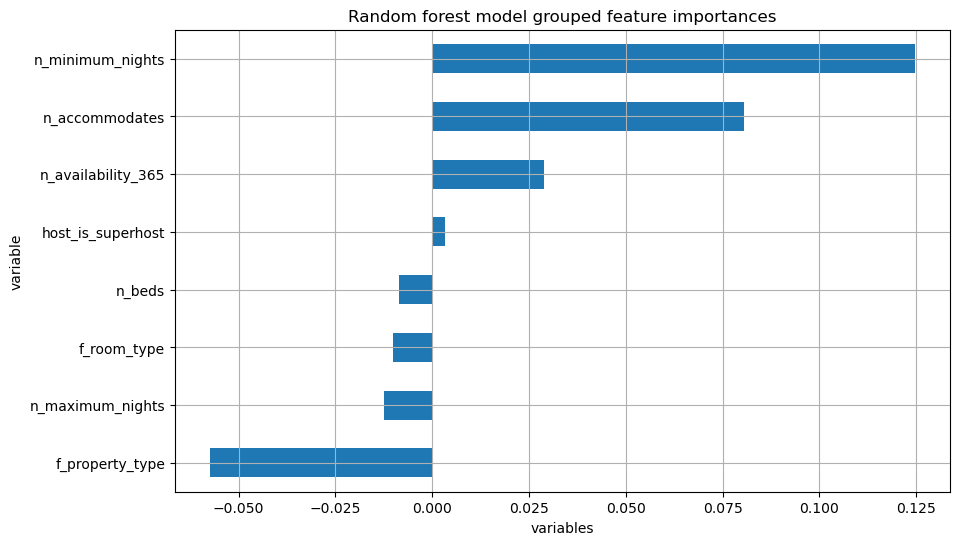

In [295]:
df_grouped_var_imp\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,6), grid = True, 
          title = 'Random forest model grouped feature importances', 
          xlabel = 'variables', legend = False
         );

In [296]:
df_clean_varimp = pd.DataFrame(
        result.importances_mean,
        data_train[predictors_2].columns)\
    .sort_values(by = 0, ascending = False)\
    .reset_index()\
    .rename({'index': 'variable', 0: 'imp'}, axis = 1)

df_clean_varimp['cumulative_imp'] = df_var_imp['imp'].cumsum()
df_clean_varimp[df_clean_varimp.cumulative_imp < 0.91]

,variable,imp,cumulative_imp
0,amenities_refrigerator,0.130821,0.180697
1,n_minimum_nights,0.124607,0.281400
2,n_accommodates,0.080439,0.342285
3,n_availability_365,0.028756,0.402057
4,amenities_bed_linens,0.016793,0.455103
5,n_review_scores_rating,0.008271,0.504822
6,d_type_entire_serviced_apartment,0.005608,0.552493
7,amenities_cooking_basics,0.003427,0.592972
8,host_is_superhost,0.003279,0.631485
9,n_number_of_reviews,0.001021,0.669666


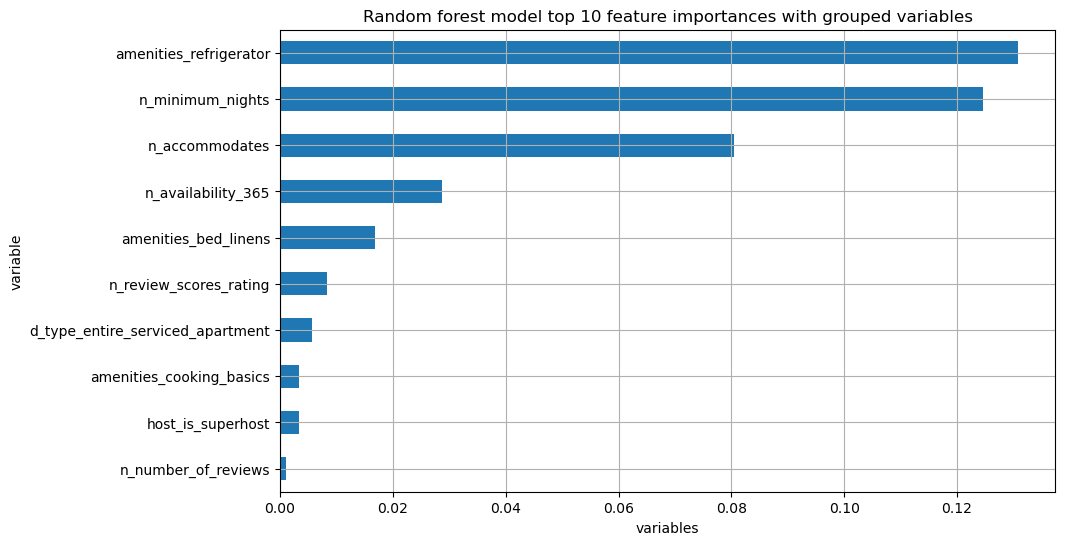

In [297]:
df_clean_varimp.iloc[0:10]\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,6), grid = True, 
          title = 'Random forest model top 10 feature importances with grouped variables', 
          xlabel = 'variables', legend = False
         );

### Partial dependence plots 

Note: easy way, sklearn has plot_partial_dependence function we do this on holdout set!   
Also, note that we run it not on the `rf_model` but on the `rf_pipeline` to manage OneHot_Encoding on the fly.

In [298]:
accomodates_pdp = partial_dependence(
    rf_pipeline, data_holdout[predictors_2], ["n_accommodates"], kind="average"
)

In [299]:
accomodates_pdp

{'grid_values': [array([2, 3, 4, 5, 6], dtype=int64)],
 'values': [array([2, 3, 4, 5, 6], dtype=int64)],
 'average': array([[107.62746093, 111.39094151, 132.69611094, 153.56233325,
         160.22131998]])}

In [300]:
# We need to access the elements of this complex data structure
type(accomodates_pdp)

sklearn.utils._bunch.Bunch

In [301]:
pd.DataFrame(
    {'number of accomodates': accomodates_pdp['values'][0], 
     'average price': accomodates_pdp['average'][0]}
    )

,number of accomodates,average price
0,2,107.627461
1,3,111.390942
2,4,132.696111
3,5,153.562333
4,6,160.221320


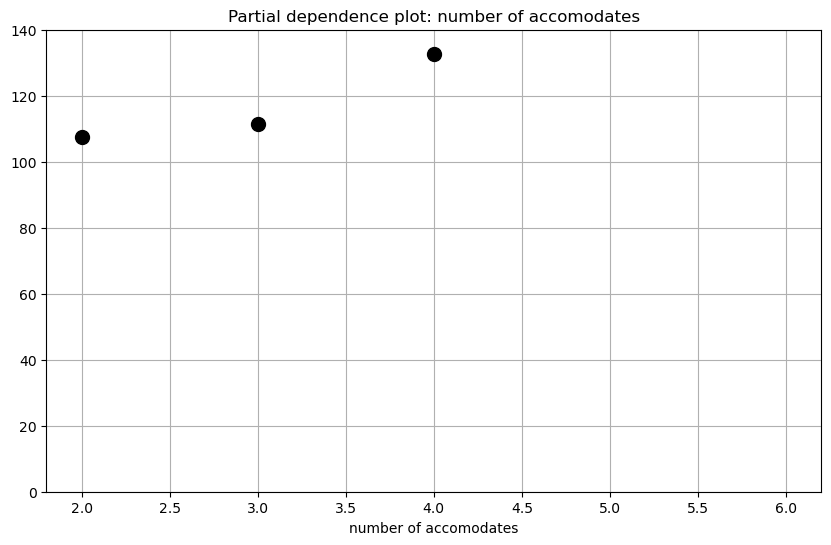

In [302]:
pd.DataFrame(
    {'number of accomodates': accomodates_pdp['values'][0], 
     'average price': accomodates_pdp['average'][0]}
    ).sort_values(by = 'average price').plot(
    kind = 'line', color = 'k', marker = 'o', markersize = 10, linewidth = 0,
    figsize = (10,6), legend = False, grid = True,
    x = 'number of accomodates', y = 'average price', ylim = (0, 140), 
    title = 'Partial dependence plot: number of accomodates'
);

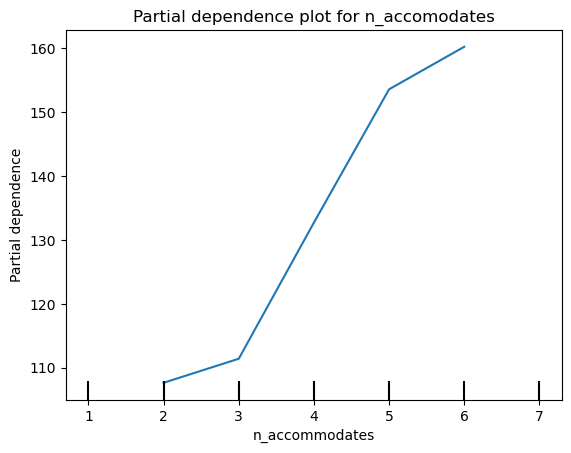

In [303]:
display = PartialDependenceDisplay(
    pd_results = [accomodates_pdp],
    features = [(0,)], 
    feature_names = data_holdout[predictors_2].columns.tolist(), 
    target_idx = 0,
    deciles = {0: np.linspace(1, 7, num=7)}
)
display.plot()
plt.title('Partial dependence plot for n_accomodates')
plt.show();

In [304]:
roomtype_pdp = partial_dependence(
    rf_pipeline, data_holdout[predictors_2], ["f_room_type"], kind="average"
)

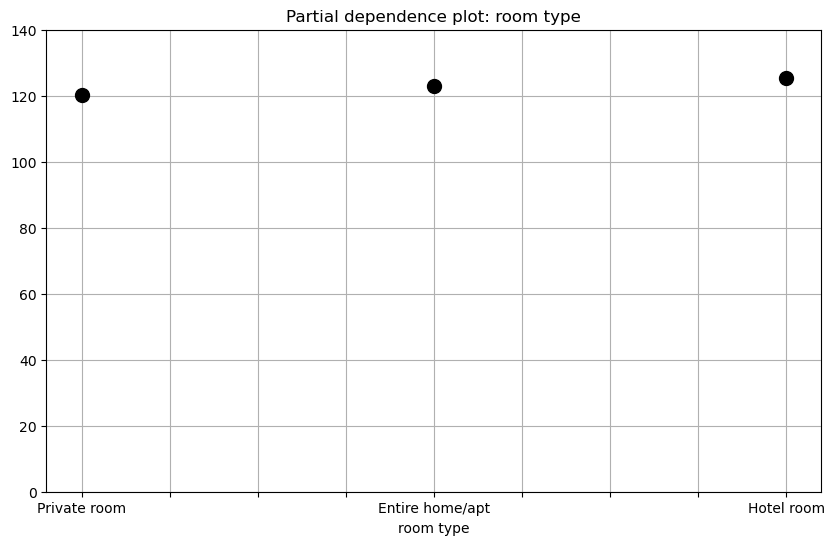

In [305]:
pd.DataFrame(
    {'room type': roomtype_pdp['values'][0], 
     'average price': roomtype_pdp['average'][0]}
    ).sort_values(by = 'average price').plot(
    kind = 'line', color = 'k', marker = 'o', markersize = 10, linewidth = 0,
    figsize = (10,6), legend = False, grid = True,
    x = 'room type', y = 'average price', ylim = (0, 140), 
    title = 'Partial dependence plot: room type'
);

#### Subsample performance: RMSE / mean(y) 

NOTE:  we do this on the holdout set, using the encoding pipeline `rf_pipeline` again.


### Horserace: compare with other models 

**NOTE: this part of the code is not finished**

1. ***OLS with dummies for area***

 using model B

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data_train)

ols_model = LinearRegression().fit(X,y)

#y_test, X_test = dmatrices("price ~ " + " + ".join(predictors_2), data_holdout)

y_hat = ols_model.predict(X)

ols_rmse = mean_squared_error(y,y_hat,squared=False)
ols_rmse

430.97051476517726

In [308]:
ols_model_coeffs_df = pd.DataFrame(
    ols_model.coef_.tolist()[0],
    index=X.design_info.column_names,
    columns=["ols_coefficient"],
).assign(ols_coefficient=lambda x: x.ols_coefficient.round(3))

In [309]:
ols_model_coeffs_df

,ols_coefficient
Intercept,-1.475737e+07
f_property_type[T.Entire home],2.645008e+11
f_property_type[T.Entire loft],7.428160e+10
f_property_type[T.Entire rental unit],6.474835e+10
f_property_type[T.Entire serviced apartment],6.081454e+10
f_property_type[T.Private room in condo],1.717410e+10
f_property_type[T.Private room in home],1.511914e+10
f_property_type[T.Private room in rental unit],8.862849e+09
f_property_type[T.Room in hotel],1.347246e+10
f_room_type[T.Hotel room],1.653820e+10


2.  LASSO

using extended model w interactions

In [310]:
from sklearn.linear_model import ElasticNet

The `ElasticNet` model is combines L1 (LASSO) and L2 (Ridge) in a single class. 

The parameter `l1_ratio` (between [0,1]) is the weight of LASSO and Ridge. l1_ratio = 1 is the pure lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [311]:
lasso_model =  ElasticNet(l1_ratio = 1, fit_intercept = True)

In [312]:
lasso_model_cv = GridSearchCV(
    lasso_model,
    # {"alpha":[i/100 for i in range(1, 26, 1)]}, > this option takes forever to run
    {"alpha":[i/100 for i in range(5, 26, 5)]},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
)


In [313]:
y, X = dmatrices("price ~ " + " + ".join(predictors_E), data_train)

3. ***CART model***

In [314]:
from sklearn.tree import DecisionTreeRegressor

In [315]:
y, X = dmatrices("price ~ " + " + ".join(predictors_2), data_train)

In [316]:
cart_model = DecisionTreeRegressor(random_state=20240129)

Get potential ccp_alpha parameters

In [317]:
path = cart_model.cost_complexity_pruning_path(X, y.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [318]:
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 1.52655666e-15, ...,
       3.20389127e+02, 2.23465377e+03, 5.73096188e+04])

In [319]:
ccp_alphas.shape

(5463,)

Apply random search to select a "best" alpha, default is 10 iterations
`RandomizedSearchCV` does not calculate all potential alphas, just a random 10-element subset of the many potential alphas

In [320]:
%%time

cart_model_cv = RandomizedSearchCV(
    cart_model,
    {"ccp_alpha":ccp_alphas},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
)
cart_model_cv.fit(X,y.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....ccp_alpha=0.1262158299912414;, score=-88.056 total time=   0.1s
[CV 2/5] END ...ccp_alpha=0.1262158299912414;, score=-899.201 total time=   0.1s
[CV 3/5] END ...ccp_alpha=0.1262158299912414;, score=-454.255 total time=   0.1s
[CV 4/5] END ...ccp_alpha=0.1262158299912414;, score=-288.786 total time=   0.1s
[CV 5/5] END ...ccp_alpha=0.1262158299912414;, score=-109.610 total time=   0.1s
[CV 1/5] END ..ccp_alpha=0.019842641800185773;, score=-88.515 total time=   0.1s
[CV 2/5] END .ccp_alpha=0.019842641800185773;, score=-899.249 total time=   0.1s
[CV 3/5] END .ccp_alpha=0.019842641800185773;, score=-454.298 total time=   0.1s
[CV 4/5] END .ccp_alpha=0.019842641800185773;, score=-288.941 total time=   0.0s
[CV 5/5] END .ccp_alpha=0.019842641800185773;, score=-110.084 total time=   0.0s
[CV 1/5] END ...ccp_alpha=0.05995021435486103;, score=-88.363 total time=   0.1s
[CV 2/5] END ..ccp_alpha=0.05995021435486103;, s

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20240129),
                   param_distributions={'ccp_alpha': array([0.00000000e+00, 0.00000000e+00, 1.52655666e-15, ...,
       3.20389127e+02, 2.23465377e+03, 5.73096188e+04])},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [321]:
cart_rmse = pd.DataFrame(cart_model_cv.cv_results_).loc[
    lambda x: x.param_ccp_alpha == cart_model_cv.best_estimator_.ccp_alpha
].mean_test_score.values[0] * -1
cart_rmse

364.5009993449212